In [1]:
from bokeh.io import output_notebook
from IPython.core.interactiveshell import InteractiveShell
from nltk.corpus import stopwords
import cufflinks
import matplotlib
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import spacy
import warnings 

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction import DictVectorizer


from scipy import stats ## Needed for stats test
import statsmodels.api as sm
from wordcloud import WordCloud, STOPWORDS

from matplotlib import pyplot as plt


In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')
InteractiveShell.ast_node_interactivity = 'all'
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

In [3]:
#warnings.filterwarnings('ignore')

In [4]:
output_notebook()

Loading BokehJS ...

In [5]:
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

nlp = spacy.load('en_core_web_sm')

In [6]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [7]:
words = set(nltk.corpus.words.words())

In [8]:
filename: str = "./../artifacts/ifa-ie-articles.csv"
df = pd.read_csv(filename)

df.columns 

Index(['URL', 'Heading', 'Date', 'Trend', 'Text', 'HTML Content', 'clean_text',
       'polarity_tokens', 'review_len', 'word_count'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   URL              872 non-null    object 
 1   Heading          872 non-null    object 
 2   Date             872 non-null    object 
 3   Trend            872 non-null    object 
 4   Text             872 non-null    object 
 5   HTML Content     872 non-null    object 
 6   clean_text       872 non-null    object 
 7   polarity_tokens  872 non-null    float64
 8   review_len       872 non-null    int64  
 9   word_count       872 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 68.2+ KB


In [10]:
df.head(5)

,URL,Heading,Date,Trend,Text,HTML Content,clean_text,polarity_tokens,review_len,word_count
0,https://www.ifa.ie/markets-and-prices/weekly-c...,Weekly Cattle Prices 26th January,26 January 2022,cattle,\r\nPrices reported as quoted or paid to IFA M...,"<div class=""single-content"">\r\n<p>Prices repo...",price report quote pay ifa member strong deman...,-0.203214,329,52
1,https://www.ifa.ie/regional/wexford-ifa-fertil...,Wexford IFA Fertiliser Seminar 24th January,25 January 2022,cattle,\r\nWexford IFA held an online public open mee...,"<div class=""single-content"">\r\n<p>Wexford IFA...",wexford ifa hold online public open meeting cu...,0.000000,465,60
2,https://www.ifa.ie/markets-and-prices/beef-she...,Beef & Sheep Update 21st January,22 January 2022,cattle,\r\nBeef Update\r\nIFA Livestock chairman Bren...,"<div class=""single-content"">\r\n<h2>Beef Updat...",beef update ifa livestock chairman brendan gol...,0.031870,1615,242
3,https://www.ifa.ie/campaigns/key-amendments-on...,"Key Amendments on Animal Transport Carried, Bu...",20 January 2022,cattle,\r\nIFA President Tim Cullinan said the voting...,"<div class=""single-content"">\r\n<p>IFA Preside...",ifa president tim cullinan say voting key amen...,0.044190,930,128
4,https://www.ifa.ie/markets-and-prices/weekly-c...,Weekly Cattle Prices 19th January,19 January 2022,cattle,\r\nPrices reported as quoted or paid to IFA M...,"<div class=""single-content"">\r\n<p>Prices repo...",price report quote pay ifa member strong deman...,-0.203214,318,50


In [11]:
def vader_scorer(df):
    '''Compute vaderSentiment scores for each article
    Args: Dataframe containing a 'text' column
    Returns: Dataframe of vader scores
    '''
    analyzer = SentimentIntensityAnalyzer()
    vader_scores = df.loc[:,'Text'].map(analyzer.polarity_scores)

    dvec = DictVectorizer()
    vader_scores = dvec.fit_transform(vader_scores)
    
    vader_scores = pd.DataFrame(vader_scores.toarray(),columns=dvec.feature_names_)
    return vader_scores

In [12]:
vader_scores = vader_scorer(df)
df = pd.concat([df,vader_scores], axis=1)
df

,URL,Heading,Date,Trend,Text,HTML Content,clean_text,polarity_tokens,review_len,word_count,compound,neg,neu,pos
0,https://www.ifa.ie/markets-and-prices/weekly-c...,Weekly Cattle Prices 26th January,26 January 2022,cattle,\r\nPrices reported as quoted or paid to IFA M...,"<div class=""single-content"">\r\n<p>Prices repo...",price report quote pay ifa member strong deman...,-0.203214,329,52,0.8689,0.012,0.908,0.080
1,https://www.ifa.ie/regional/wexford-ifa-fertil...,Wexford IFA Fertiliser Seminar 24th January,25 January 2022,cattle,\r\nWexford IFA held an online public open mee...,"<div class=""single-content"">\r\n<p>Wexford IFA...",wexford ifa hold online public open meeting cu...,0.000000,465,60,-0.6249,0.046,0.954,0.000
2,https://www.ifa.ie/markets-and-prices/beef-she...,Beef & Sheep Update 21st January,22 January 2022,cattle,\r\nBeef Update\r\nIFA Livestock chairman Bren...,"<div class=""single-content"">\r\n<h2>Beef Updat...",beef update ifa livestock chairman brendan gol...,0.031870,1615,242,0.9501,0.037,0.897,0.065
3,https://www.ifa.ie/campaigns/key-amendments-on...,"Key Amendments on Animal Transport Carried, Bu...",20 January 2022,cattle,\r\nIFA President Tim Cullinan said the voting...,"<div class=""single-content"">\r\n<p>IFA Preside...",ifa president tim cullinan say voting key amen...,0.044190,930,128,0.8193,0.048,0.862,0.090
4,https://www.ifa.ie/markets-and-prices/weekly-c...,Weekly Cattle Prices 19th January,19 January 2022,cattle,\r\nPrices reported as quoted or paid to IFA M...,"<div class=""single-content"">\r\n<p>Prices repo...",price report quote pay ifa member strong deman...,-0.203214,318,50,0.8689,0.012,0.907,0.081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,https://www.ifa.ie/farm-sectors/any-march-milk...,Any March Milk Price Cut Will Be Interpreted a...,10 April 2018,dairy,\r\nIFA National Dairy Committee Chairman Tom ...,"<div class=""single-content"">\r\n<p>IFA Nationa...",ifa national dairy committee chairman tom phel...,0.024123,860,131,-0.6810,0.122,0.771,0.108
868,https://www.ifa.ie/farm-sectors/minister-must-...,Minister Must Treat Fodder Crisis as National ...,6 April 2018,dairy,\r\nWith a further Met Eireann yellow alert si...,"<div class=""single-content"">\r\n<p>With a furt...",meet eireann yellow alert situation today emer...,0.122794,1390,195,0.2500,0.061,0.869,0.071
869,https://www.ifa.ie/policy-areas/weather-crisis...,Weather Crisis Requires Emergency Action Initi...,3 April 2018,dairy,\r\nIFA President Joe Healy has insisted Minis...,"<div class=""single-content"">\r\n<p>IFA Preside...",ifa president joe healy insist minister agricu...,0.064167,963,137,-0.9716,0.122,0.820,0.058
870,https://www.ifa.ie/farm-sectors/teagasc-fodder...,Teagasc Fodder Support,3 April 2018,dairy,\r\nTeagasc has established a Forage Register ...,"<div class=""single-content"">\r\n<p>Teagasc has...",teagasc establish forage register help farmer ...,0.180000,513,71,0.6597,0.000,0.960,0.040


In [13]:
df.to_csv(filename, index=None)

In [14]:
df['compound'][df['Trend'] == 'cattle'].iplot(
    kind='hist',
    bins=50,
    xTitle='Sentiment Score',
    linecolor='black',
    yTitle='count',
    title='Token Polarity Distribution Of The Cattle Articles')

In [15]:
df['compound'][df['Trend'] == 'dairy'].iplot(
    kind='hist',
    bins=50,
    xTitle='Sentiment Score',
    linecolor='black',
    yTitle='count',
    title='Token Polarity Distribution Of The Dairy Articles')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   URL              872 non-null    object 
 1   Heading          872 non-null    object 
 2   Date             872 non-null    object 
 3   Trend            872 non-null    object 
 4   Text             872 non-null    object 
 5   HTML Content     872 non-null    object 
 6   clean_text       872 non-null    object 
 7   polarity_tokens  872 non-null    float64
 8   review_len       872 non-null    int64  
 9   word_count       872 non-null    int64  
 10  compound         872 non-null    float64
 11  neg              872 non-null    float64
 12  neu              872 non-null    float64
 13  pos              872 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 95.5+ KB


In [17]:
df.head(5)

,URL,Heading,Date,Trend,Text,HTML Content,clean_text,polarity_tokens,review_len,word_count,compound,neg,neu,pos
0,https://www.ifa.ie/markets-and-prices/weekly-c...,Weekly Cattle Prices 26th January,26 January 2022,cattle,\r\nPrices reported as quoted or paid to IFA M...,"<div class=""single-content"">\r\n<p>Prices repo...",price report quote pay ifa member strong deman...,-0.203214,329,52,0.8689,0.012,0.908,0.080
1,https://www.ifa.ie/regional/wexford-ifa-fertil...,Wexford IFA Fertiliser Seminar 24th January,25 January 2022,cattle,\r\nWexford IFA held an online public open mee...,"<div class=""single-content"">\r\n<p>Wexford IFA...",wexford ifa hold online public open meeting cu...,0.000000,465,60,-0.6249,0.046,0.954,0.000
2,https://www.ifa.ie/markets-and-prices/beef-she...,Beef & Sheep Update 21st January,22 January 2022,cattle,\r\nBeef Update\r\nIFA Livestock chairman Bren...,"<div class=""single-content"">\r\n<h2>Beef Updat...",beef update ifa livestock chairman brendan gol...,0.031870,1615,242,0.9501,0.037,0.897,0.065
3,https://www.ifa.ie/campaigns/key-amendments-on...,"Key Amendments on Animal Transport Carried, Bu...",20 January 2022,cattle,\r\nIFA President Tim Cullinan said the voting...,"<div class=""single-content"">\r\n<p>IFA Preside...",ifa president tim cullinan say voting key amen...,0.044190,930,128,0.8193,0.048,0.862,0.090
4,https://www.ifa.ie/markets-and-prices/weekly-c...,Weekly Cattle Prices 19th January,19 January 2022,cattle,\r\nPrices reported as quoted or paid to IFA M...,"<div class=""single-content"">\r\n<p>Prices repo...",price report quote pay ifa member strong deman...,-0.203214,318,50,0.8689,0.012,0.907,0.081


<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Cattle')

Text(0.5, 0, 'Dairy')

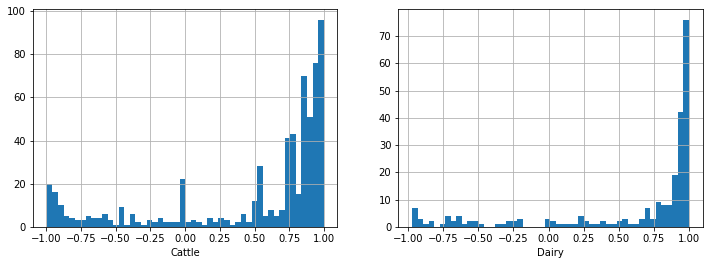

In [18]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
df[df.Trend=='cattle']['compound'].hist(ax=ax[0], bins=50)
df[df.Trend=='dairy']['compound'].hist(ax=ax[1], bins=50)
ax[0].set_xlabel('Cattle')
ax[1].set_xlabel('Dairy')
plt.show()

Hypothesis:
Null Hypothesis is that sentiment for the beef and the dairy was the same

<AxesSubplot:xlabel='Trend', ylabel='compound'>

<AxesSubplot:xlabel='Trend', ylabel='compound'>

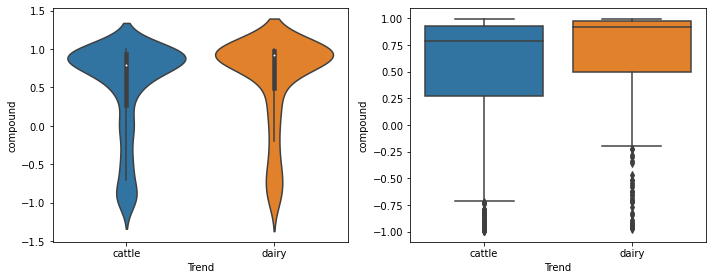

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
sns.violinplot(y='compound', x='Trend', data=df[df.Trend != ''], ax=ax[0])
sns.boxplot(y='compound', x='Trend', data=df[df.Trend != ''], ax=ax[1])
plt.tight_layout()
plt.show()

In [20]:
np.mean(df[df.Trend == 'cattle']['compound'])
np.mean(df[df.Trend == 'dairy']['compound'])

0.49992936507936475

0.5972123966942151

In [61]:
print('StDev of beef sentiment',np.std(df[df.Trend == 'cattle']['compound']))
print('StDev of dairy sentiment',np.std(df[df.Trend == 'dairy']['compound']))

StDev of beef sentiment 0.6208893387928167
StDev of dairy sentiment 0.5937943328827562


Running SciPy's t-test:

In [62]:
stats.ttest_ind(df[df.Trend == 'cattle']['compound'],
                df[df.Trend == 'dairy']['compound'], equal_var=True)

Ttest_indResult(statistic=-2.094357544561826, pvalue=0.03651693332379792)

Alternatively could have run Statsmodel API's ztest:

In [39]:
sm.stats.ztest(df[df.Trend == 'cattle']['compound'],
               df[df.Trend == 'dairy']['compound'])

(array([-2.09435754, -2.09435754]), array([0.03622814, 0.03622814]))

So p-value is 3.6%, which says that if null hypothesis is assumed to be true, then there is 3.62% chance of observing what we've just observed as the alternate hypothesis.If the null was true there is no chance that the alternative hypthesis is true.
The 95% confidence interval can be constructed

In [40]:
p_bf = np.mean(df[df.Trend == 'cattle']['compound'])
p_dr = np.mean(df[df.Trend == 'dairy']['compound'])

num_bf = len(df[df.Trend == 'cattle'])
num_dr = len(df[df.Trend == 'dairy'])

The s.e. for each population is sigma / sqrt(n)

In [41]:
se_bf = np.std(df[df.Trend == 'cattle']['compound']) / np.sqrt(num_bf)
se_dr = np.std(df[df.Trend == 'dairy']['compound']) / np.sqrt(num_dr)

Alternatively, statsmodels has a standard error function of the mean of a distribution:

In [42]:
print('beef sentiment s.e.', stats.sem(df[df.Trend == 'cattle']['compound'], axis=None))
print('dairy sentiment s.e.', stats.sem(df[df.Trend == 'dairy']['compound'], axis=None))

beef sentiment s.e. 0.017498520782293928
dairy sentiment s.e. 0.02701857768061431


In [43]:
se_diff = np.sqrt(se_bf**2 + se_dr**2) # Was se_br**2 + se_dr**2

In [44]:
diff = p_bf - p_dr
lcb = diff - (1.96 * se_diff)
ucb = diff + (1.96 * se_diff)
(lcb, ucb)

(compound   -0.186434
 compound   -0.186434
 dtype: float64,
 compound   -0.008132
 compound   -0.008132
 dtype: float64)

Visualise sentiment
Can we visualise what type of sentiment ifi had for the beef vs the dairy? Let's look at the words that were being used to better understand how the ifi described each entity:

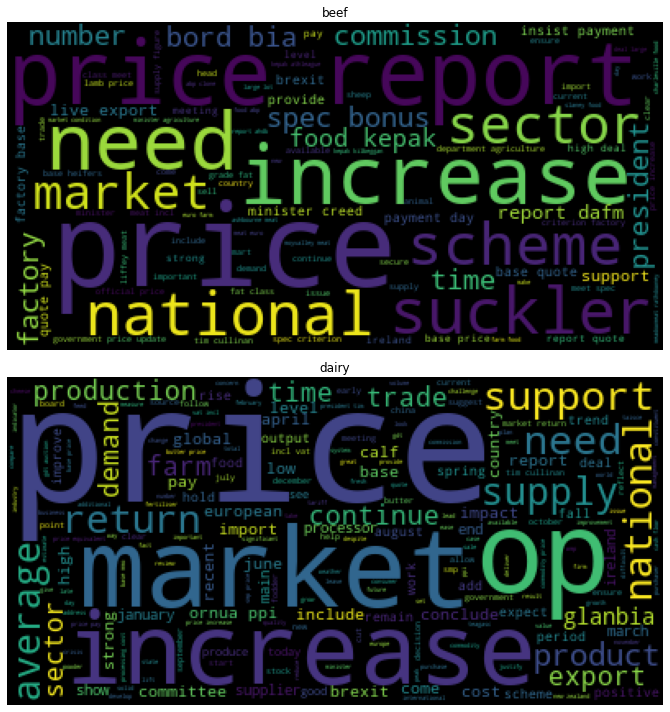

In [15]:
beef_text = " ".join(art for art in df.clean_text[df.Trend=='cattle']) # Changed to cattle
dairy_text = " ".join(art for art in df.clean_text[df.Trend=='dairy'])

stopwords = set(STOPWORDS)
stopwords.update(['http', 'https', 'www', 'amp', 'ly', 'bit','beef','steer','heifer',
                  'farmer','ifa','member','livestock','chairman','irish',
                  'cattle','say','brendan','golden','bull','young','angus','wood',
                  'joe', 'healy','milk','dairy','tom','phelan','week','year','month','cow'])

beef_wordcloud = WordCloud(stopwords=stopwords).generate(beef_text)
dairy_wordcloud = WordCloud(stopwords=stopwords).generate(dairy_text)

fig, ax = plt.subplots(nrows=2, figsize=(10,10))
ax[0].imshow(beef_wordcloud)
ax[0].set_title('beef')
ax[0].axis('off')
ax[1].imshow(dairy_wordcloud)
ax[1].set_title('dairy')
ax[1].axis('off')
plt.tight_layout()
plt.show;

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



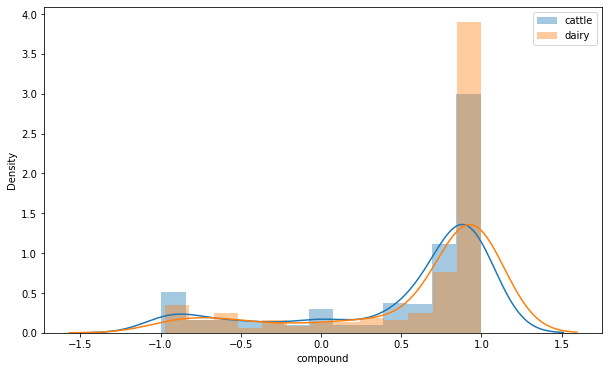

In [21]:
sns.distplot(df[df.Trend == 'cattle']['compound'], label='cattle')
sns.distplot(df[df.Trend == 'dairy']['compound'], label='dairy')
plt.legend()
plt.show();